<a href="https://colab.research.google.com/github/massilva/dominando-data-science/blob/main/aula09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula09 - Classificação e validação cruzada

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
data = pd.read_csv(url)

data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['charges'] = data['charges'] / 1000
data['region'] = data['region'].map({region: i for i, region in enumerate(data['region'].unique())})

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16.884924
1,18,1,33.770,1,0,1,1.725552
2,28,1,33.000,3,0,1,4.449462
3,33,1,22.705,0,0,2,21.984471
4,32,1,28.880,0,0,2,3.866855


### KFold por atributos (`smoker` e `sex`)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
predictions = ['smoker',]
models = [
  LogisticRegression(),
  *[KNeighborsClassifier(n_neighbors=i) for i in range(5, 50, 10)],
  *[DecisionTreeClassifier(max_depth=i) for i in range(1, 6)],
]
names = [
  'Regressão Logística',
  *['KNN - K = {}'.format(i) for i in range(5, 50, 10)],
  *['Árvore - prof. - {}'.format(i) for i in range(1, 6)],
]


In [5]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = data[['bmi', 'charges']]

In [6]:
def plot(model, name, Xtrain, ytrain, Xtest, ytest):
  model.fit(Xtrain, ytrain)
  plt.figure(figsize = (15, 6))

  plt.subplot(1, 2, 1)
  plot_decision_regions(Xtrain.values, ytrain.values, clf = model, legend = 1)
  plt.xlabel('IMC')
  plt.ylabel('Custos')
  plt.title('TREINO {}'.format(name))

  plt.subplot(1, 2, 2)
  plot_decision_regions(Xtest.values, ytest.values, clf = model, legend = 1)
  plt.xlabel('IMC')
  plt.ylabel('Custos')
  plt.title('TESTE {}'.format(name))

  plt.show()


In [7]:
import math

range_n_splits = range(5, 11)
best_predictions = {}

for item in predictions:
  print(': bmi, charges --> {}'.format(item))
  y = data[item]
  best_predictions[item] = {}
  best_k, best_mean, best_model = -1, -1, '-'

  for idx, model in enumerate(models):
    print(':: {}'.format(names[idx]))

    for n_splits in range_n_splits:
      print('::: {}Fold'.format(n_splits))
      print()
      validation = KFold(n_splits=n_splits, shuffle=True)
      reglog = cross_validate(model, X, y, cv = validation, scoring=['accuracy', 'recall', 'precision'])
      print('     Acurácia:', round(reglog['test_accuracy'].mean(), 4))
      print('Sensibilidade:', round(reglog['test_recall'].mean(), 4))
      print('     Precisão:', round(reglog['test_precision'].mean(), 4))
      print()

      mean = reglog['test_accuracy'].mean()
      if mean >= best_mean:
        best_mean = mean
        best_k = n_splits
        best_model = names[idx]
  
  print()
  best_predictions[item] = {'k': best_k, 'value': best_mean, 'model': best_model}

best_predictions

: bmi, charges --> smoker
:: Regressão Logística
::: 5Fold

     Acurácia: 0.9312
Sensibilidade: 0.802
     Precisão: 0.8533

::: 6Fold

     Acurácia: 0.9312
Sensibilidade: 0.8075
     Precisão: 0.8459

::: 7Fold

     Acurácia: 0.932
Sensibilidade: 0.806
     Precisão: 0.8596

::: 8Fold

     Acurácia: 0.9342
Sensibilidade: 0.8062
     Precisão: 0.8607

::: 9Fold

     Acurácia: 0.9328
Sensibilidade: 0.8041
     Precisão: 0.8554

::: 10Fold

     Acurácia: 0.9335
Sensibilidade: 0.8028
     Precisão: 0.8614

:: KNN - K = 5
::: 5Fold

     Acurácia: 0.9581
Sensibilidade: 0.9432
     Precisão: 0.8613

::: 6Fold

     Acurácia: 0.9574
Sensibilidade: 0.9411
     Precisão: 0.8641

::: 7Fold

     Acurácia: 0.9596
Sensibilidade: 0.9416
     Precisão: 0.8742

::: 8Fold

     Acurácia: 0.9589
Sensibilidade: 0.9437
     Precisão: 0.8665

::: 9Fold

     Acurácia: 0.9604
Sensibilidade: 0.9403
     Precisão: 0.8728

::: 10Fold

     Acurácia: 0.9589
Sensibilidade: 0.9372
     Precisão: 0.8719

:

{'smoker': {'k': 8, 'model': 'Árvore - prof. - 3', 'value': 0.96410749928714}}

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


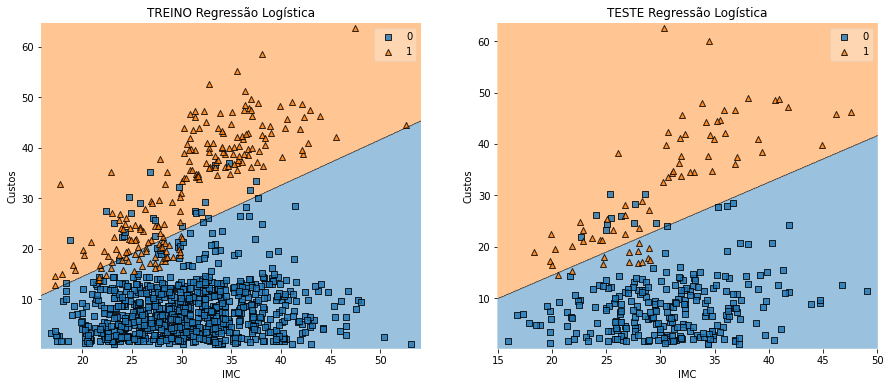

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


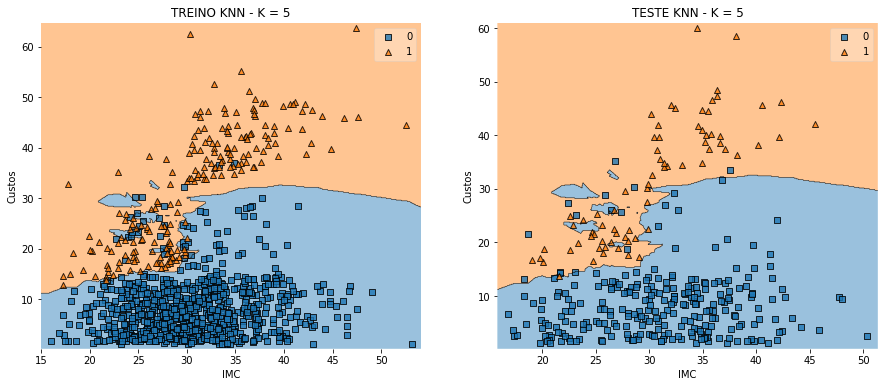

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


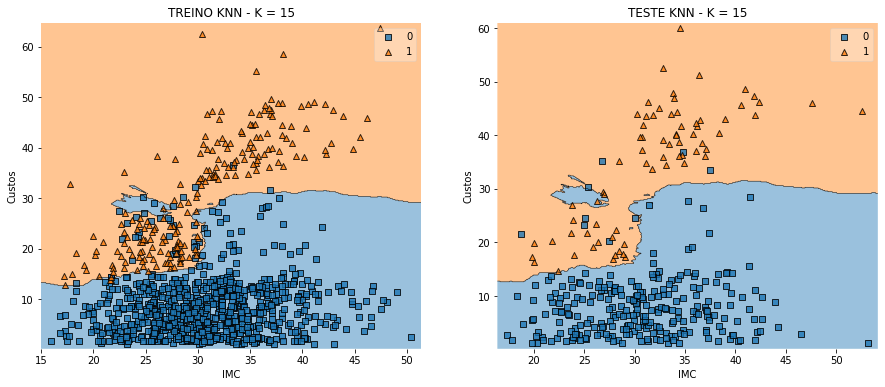

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


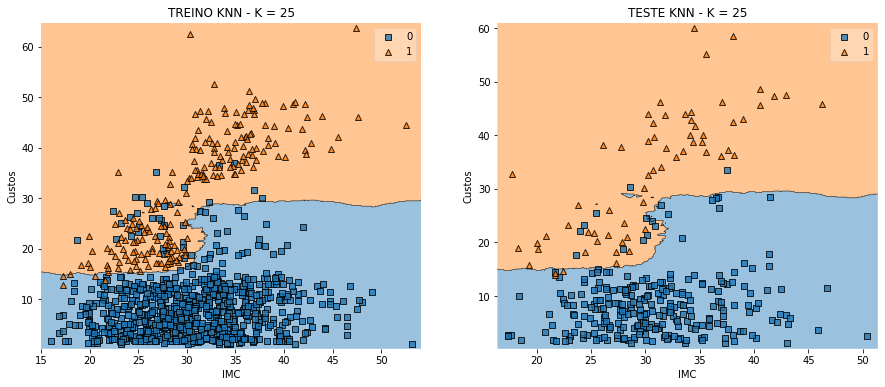

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


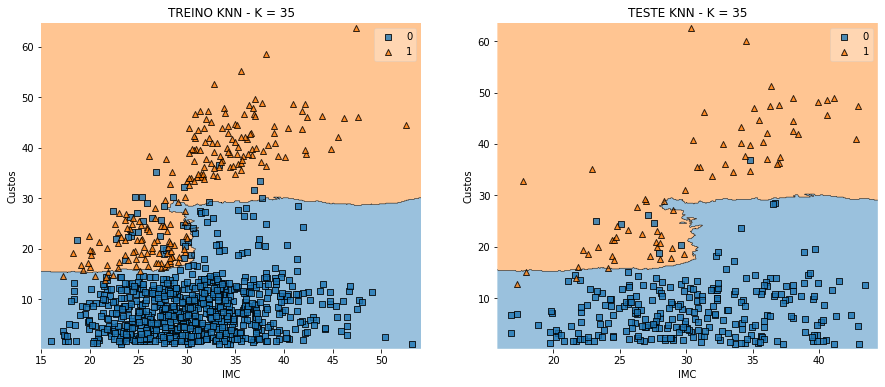

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


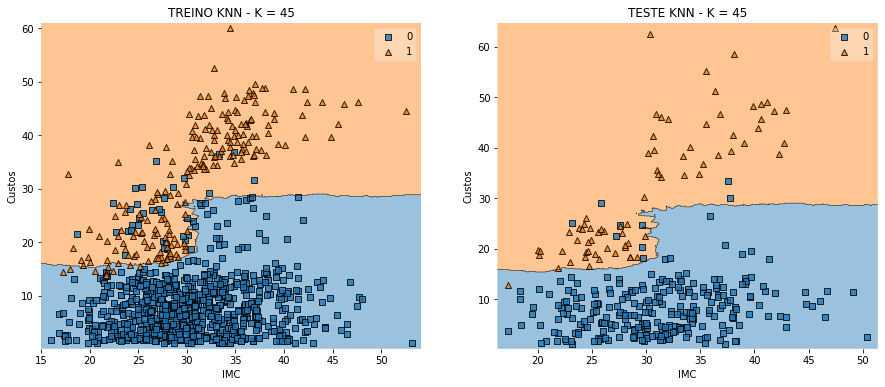

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


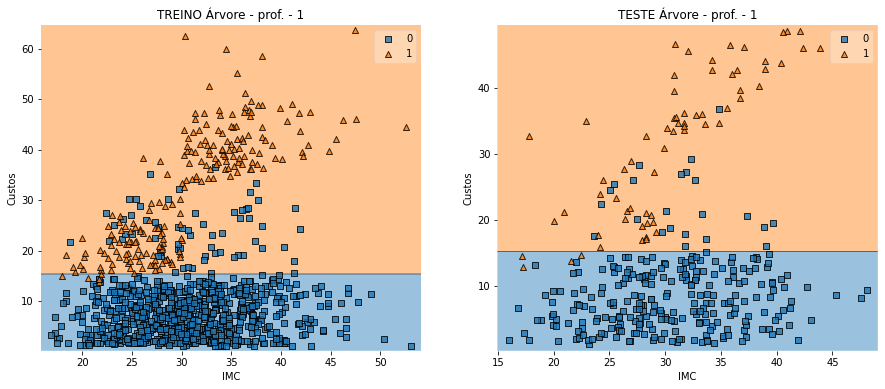

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


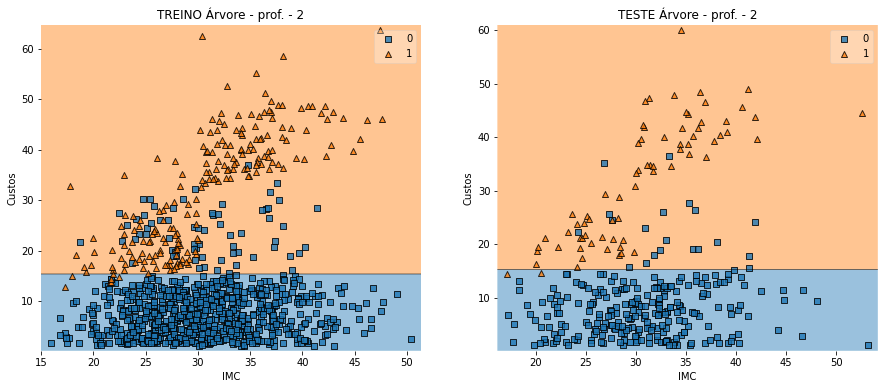

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


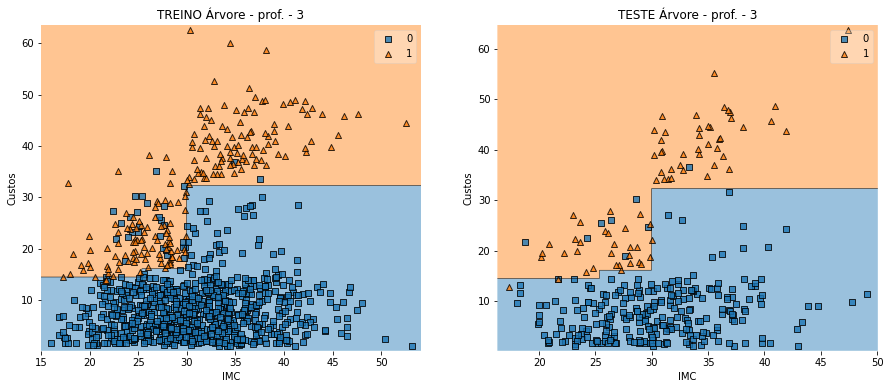

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


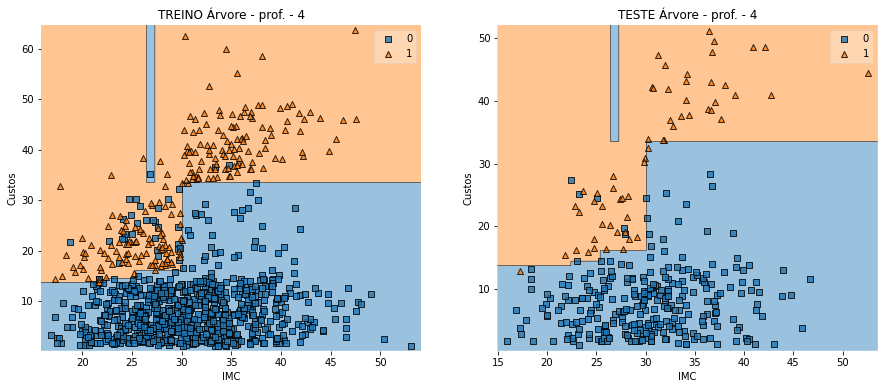

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


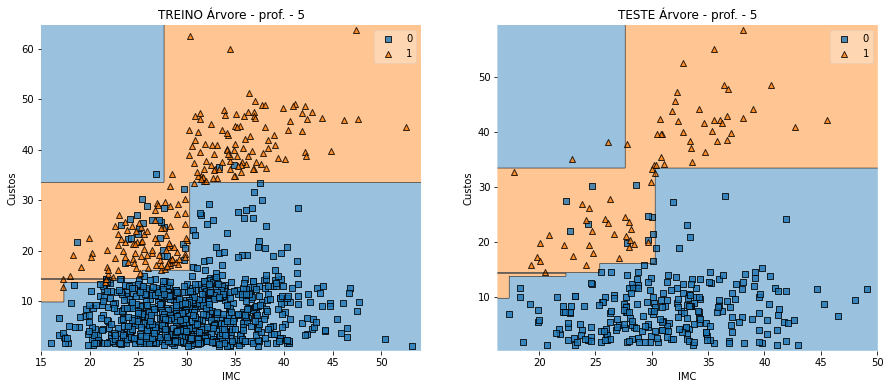

In [8]:
y = data['smoker']

for idx, model in enumerate(models):
  Xtrain, Xtest, ytrain, ytest  = train_test_split(X, y, test_size = 0.25)
  plot(model, names[idx], Xtrain, ytrain, Xtest, ytest)


### Os valores ótimos

In [9]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

def get_best_k_fold(model, X, y, range_n_splits=range(5,11)):
  best_k, best_mean = -1, -1
  for n_splits in range_n_splits:
    validation = KFold(n_splits=n_splits, shuffle=True)
    reglog = cross_validate(model, X, y, cv = validation, scoring=['accuracy', 'recall', 'precision'])
    mean = reglog['test_accuracy'].mean()
    if mean >= best_mean:
      best_mean = mean
      best_k = n_splits
  return best_k, best_mean

def holdoutRepeatedTest(model, X, y, n = 100, test_size = 0.25): 
    mean_test = []

    for i in range(n):
        Xtrain , Xtest, ytrain, ytest  = train_test_split(X, y, test_size = test_size)
        reg = model
        reg.fit(Xtrain, ytrain)
        predicts = reg.predict(Xtest)
        _, mean = get_best_k_fold(model, X, y)
        mean_test.append(mean)

    return np.array(mean_test).mean().round(2)

def get_best(model_class, key_attr, X, y, lower=3, upper=100, step=3):
  best_index, best_test = math.inf, math.inf
  '''Número de interações que o algoritmo poderá ficar sem encontrar um valor melhor que o já encontrado

  - o próximo número, depois da raiz quadrada do máximo, divísivel por `step`
  '''
  stop_when = ((upper ** 0.5) // step + 1) * step
  not_change_count = 0 #número de vezes que o algoritmo consecutivamente não encontrou um valor melhor que o melhor

  for i in range(lower, upper, step):
    params = {
        key_attr: i,
    }
    model = model_class(**params)
    test = holdoutRepeatedTest(model, X, y)

    if best_test > test:
      best_index, best_test = i, test
      not_change_count = 0
    else:
      not_change_count += 1

    if not_change_count >= stop_when:
      break

  return best_index, best_test


#### Utilizando `lower` e `step` defaults

In [10]:
X = data[['bmi', 'charges']]
y = data['smoker']

In [11]:
best_k, best_test = get_best(KNeighborsClassifier, 'n_neighbors', X, y)
print('n_neighbors: {}, value: {}'.format(best_k, best_test))

n_neighbors: 3, value: 0.96


In [12]:
best_depth, best_test = get_best(DecisionTreeClassifier, 'max_depth', X, y)
print('depth: {}, value: {}'.format(best_depth, best_test))

depth: 9, value: 0.95


#### Utilizando `lower` e `step` começando de 1

In [13]:
best_k, best_test = get_best(KNeighborsClassifier, 'n_neighbors', X, y, lower=1, step=1)
print('n_neighbors: {}, value: {}'.format(best_k, best_test))

n_neighbors: 2, value: 0.94


In [14]:
best_depth, best_test = get_best(DecisionTreeClassifier, 'max_depth', X, y, lower=1, step=1)
print('depth: {}, value: {}'.format(best_depth, best_test))

depth: 1, value: 0.93
